# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Malus-with-two-polarizers-and-lambda/4-waveplate" data-toc-modified-id="Malus-with-two-polarizers-and-lambda/4-waveplate-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Malus with two polarizers and $\lambda/4$ waveplate</a></div><div class="lev3 toc-item"><a href="#Motors-definition" data-toc-modified-id="Motors-definition-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Motors definition</a></div><div class="lev3 toc-item"><a href="#Labjack-definition" data-toc-modified-id="Labjack-definition-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Labjack definition</a></div><div class="lev2 toc-item"><a href="#Experiments" data-toc-modified-id="Experiments-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Experiments</a></div><div class="lev3 toc-item"><a href="#moving-polarizer-4-and-waveplate" data-toc-modified-id="moving-polarizer-4-and-waveplate-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>moving polarizer 4 and waveplate</a></div><div class="lev2 toc-item"><a href="#Final:-Close" data-toc-modified-id="Final:-Close-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Final: Close</a></div>

# Malus with two polarizers and $\lambda/4$ waveplate

Author: Luis Miguel Sanchez Brea

Date:   20/02/2018

Purpose: Ecograb project, polariscope callibration

We have diode laser at 850 nm (current = 329 mA) 60 db
We have lens for collimating and Thorlabs DG10-600-B diffuser and a sheet of paper

We have polarizer 1 Thorlabs LPNIRE100-B
We have polarizer 4 Thorlabs LPNIRE100-B
We have $\lambda/4$ Thorlabs WPQ10E-850-SP at motor 2

Polarizer 1 is placed at 0º, arbitrarily
Polarizer 4 is placed at 70.496º for pass light (aligned to polarizer 1)

We have tried to obtain experimental parameters of waveplate, but it has not been possible for still positions of polarimeters.
Now, we measure at a double for loop, moving polarimeter 4 and waveplate 2

**objective** 
In this notebook we only determine the experimental intensity distribution for post-analysis

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import hickle as hkl
import time
from pprint import pprint
from __future__ import print_function

### Motors definition

In [3]:
from polarimeter.motors.rotary_motors import Motors
from polarimeter import COMPORTS, DIR_MOV
from polarimeter.polarimeter import get_polarimeter_parameters


In [4]:
parameters=get_polarimeter_parameters(kind='real')
pprint(parameters)

Vels = [600, 600, 600, 600]

[{'p0': 0.128242248318, 'p1': 0.946436027636, 'theta_axis': 0},
 {'a': 1, 'b': 1, 'delta': 1.5707963267948966, 'theta_axis': 134.39},
 {'a': 1, 'b': 1, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'p0': 0.128242248318, 'p1': 0.946436027636, 'theta_axis': 70.445}]


In [5]:
motors = Motors(RS232_COMPORT=COMPORTS, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



### Labjack definition

In [6]:
import u3
import LabJackPython

V=1.
mV=V/1000

def to_bits(variable_integer, num_bits=16, verbose=True):
    """
    takes an integer an generates a list with bits

    Args:
        variable_integer (int): integer with data
        num_bits (int): num of output bits: 8,16, 32, 64
    """
    if num_bits == 8:
        output = map(int, [x for x in '{:08b}'.format(variable_integer)])
    elif num_bits == 16:
        output = map(int, [x for x in '{:016b}'.format(variable_integer)])
    elif num_bits == 32:
        output = map(int, [x for x in '{:032b}'.format(variable_integer)])
    elif num_bits == 64:
        output = map(int, [x for x in '{:064b}'.format(variable_integer)])

    if verbose is True:
        print( output)
    return output

In [7]:
# loads labjack
d=u3.U3()

In [8]:
print("\n Callibration data:")
data_callibration=d.getCalibrationData()
pprint(data_callibration)


 Callibration data:
{'dac0Offset': -0.6872114308644086,
 'dac0Slope': 50.9896679460071,
 'dac1Offset': -0.701979405945167,
 'dac1Slope': 50.91950369440019,
 'hvAIN0Offset': -10.518997645704076,
 'hvAIN0Slope': 0.00031980290077626705,
 'hvAIN1Offset': -10.489001986570656,
 'hvAIN1Slope': 0.0003192389849573374,
 'hvAIN2Offset': -10.523998295888305,
 'hvAIN2Slope': 0.0003195337485522032,
 'hvAIN3Offset': -10.51609767600894,
 'hvAIN3Slope': 0.00031975959427654743,
 'lvDiffOffset': -2.490987469209358,
 'lvDiffSlope': 7.56862573325634e-05,
 'lvSEOffset': 0.001728925621137023,
 'lvSESlope': 3.775535151362419e-05,
 'tempSlope': 0.01259785215370357,
 'vRef1.5AtCal': 0.0,
 'vRefAtCAl': 2.486867640633136,
 'vRegAtCal': 0.0}


In [9]:
AIN_number=1
ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
print(ainValue)


0.635727533372


In [10]:
def get_intensity(AIN_number=1, verbose=True):
    ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
    ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
    if verbose is True:
        print("{:2.5f}".format(ainValue), end=', ')
    return ainValue

In [11]:
get_intensity(verbose=True)

0.63573, 

0.6357275333721191

## Experiments
### moving polarizer 4 and waveplate

We move polarizer 4 and waveplate 2

In [12]:
# Move motor 1 to maximum position of laser diode
Vels=[150,150,150,150]

motors.move(
        positions=[0, 0, 0, 0], velocities=Vels, kind='absolute', verbose=False)
motors.get_position()
get_intensity(verbose=True)

current positions = ([-0.], [ 0.], [ 0.], [-0.])
0.63573, 

0.6357275333721191

In [13]:
num_data=10
angle_2=sp.linspace(0,90,11)
angle_4=sp.linspace(0,180,11)
Angle_2, Angle_4 = sp.meshgrid(angle_2, angle_4)
intensities=sp.zeros_like(Angle_2,dtype=float)
print( intensities.shape)

(11L, 11L)


In [14]:
for i2, a2 in enumerate(angle_2):
    print('\n {:2}/{}: '.format(i2, len(angle_2)), end='' )
    for i4, a4 in enumerate(angle_4):
        motors.move(
            positions=[0, a2, 0, a4], velocities=Vels,  kind='absolute', verbose=False)
        intensities[i4,i2]=get_intensity(verbose=True)



  0/11: 0.63573, 0.65108, 0.70225, 0.76877, 0.81993, 0.84552, 0.83017, 0.77900, 0.71248, 0.65108, 0.63573, 
  1/11: 0.47711, 0.57433, 0.73806, 0.90180, 1.00414, 1.00414, 0.90180, 0.73806, 0.57433, 0.47199, 0.47711, 
  2/11: 0.29290, 0.41570, 0.66131, 0.93762, 1.14230, 1.19346, 1.07066, 0.82505, 0.54362, 0.34407, 0.29802, 
  3/11: 0.16498, 0.23150, 0.49757, 0.86087, 1.17811, 1.33162, 1.26510, 0.99391, 0.63061, 0.31337, 0.16498, 
  4/11: 0.13428, 0.09334, 0.30313, 0.68690, 1.09624, 1.36744, 1.40325, 1.19346, 0.80970, 0.40035, 0.13428, 
  5/11: 0.22126, 0.05241, 0.15986, 0.48734, 0.91715, 1.28557, 1.44419, 1.34185, 1.01437, 0.58456, 0.21615, 
  6/11: 0.39012, 0.13428, 0.11381, 0.33383, 0.71760, 1.12183, 1.37255, 1.39302, 1.16276, 0.77900, 0.38500, 
  7/11: 0.58968, 0.29290, 0.18033, 0.27755, 0.56409, 0.92227, 1.21393, 1.32650, 1.21905, 0.93762, 0.58456, 
  8/11: 0.73295, 0.47711, 0.33383, 0.34407, 0.51292, 0.76877, 1.01949, 1.16788, 1.16276, 0.98879, 0.72783, 
  9/11: 0.78412, 0.62549, 0

<IPython.core.display.Javascript object>


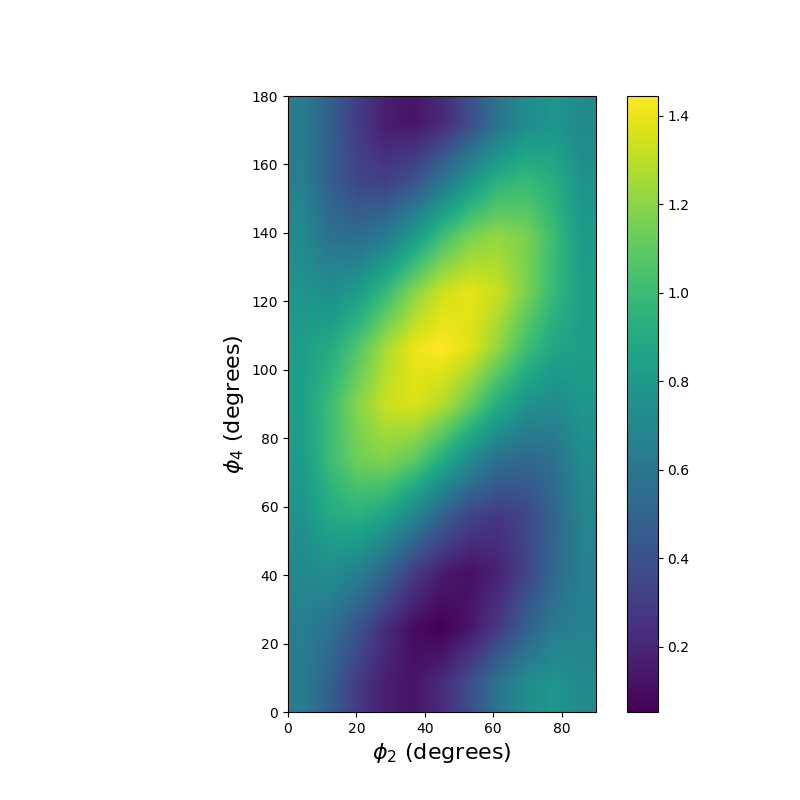

In [15]:
plt.figure(figsize=(8,8))
plt.imshow(intensities,
            interpolation='bilinear',
                      aspect='auto',
            origin='lower',extent=[angle_2[0], angle_2[-1], angle_4[0], angle_4[-1]])
plt.xlabel('$\phi_2$ (degrees)', fontsize=16)
plt.ylabel('$\phi_4$ (degrees)', fontsize=16)
plt.axis('scaled')
plt.colorbar(orientation='vertical')
plt.savefig('intensities_2_4_180305b.pdf')

In [16]:
from scipy.io import savemat

data=dict(angle_2=angle_2, angle_4=angle_4, intensities=intensities)
data2=np.zeros((len(angle_2),len(angle_4), 3),dtype=float)
data2[:,:,0]=Angle_2
data2[:,:,1]=Angle_4
data2[:,:,2]=intensities
np.save('intensities_2_4_180305b_angle-polarizer.npy', data2)
savemat('intensities_2_4_180305b_angle-polarizer.mat', data, oned_as='row')

## Final: Close

In [29]:
motors.close()
del motors
LabJackPython.Close()